# this program is to read individual TrapZoidal csv file and put them into one single dataframe
# Plotting trapzoidal_On current results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np

In [10]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData
fpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapeON'
all_files = glob.glob(fpath + "/*.csv")

In [11]:
pwd

'C:\\Users\\LingxinW\\Google Drive\\PythonScripts\\EphysAnalysis'

In [12]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head(10)

,worm_strain,cell_ID,trap_rate,amp_peaks_on,t_peaks_on,t_start_act_on,t_half_act_on,t_half_decay_on,group_number
0,GN932,ALMLW007,6153,-16.316273,0.1573,0.1499,3.70,15.4,3
1,GN932,ALMLW007,11428,-17.956439,0.1540,0.1499,2.05,21.1,3
0,GN932,ALMLW007,80,-1.608982,0.1801,0.1499,15.10,9.8,3
1,GN932,ALMLW007,800,-9.220580,0.1628,0.1499,6.45,15.7,3
2,GN932,ALMLW007,7272,-19.785599,0.1569,0.1499,3.50,17.8,3
3,GN932,ALMLW007,13333,-22.512078,0.1547,0.1497,2.50,24.8,3
0,GN932,ALMLW007,2580,-14.763563,0.1581,0.1499,4.10,17.0,3
1,GN932,ALMLW007,3809,-16.777113,0.1586,0.1499,4.35,18.4,3
2,GN932,ALMLW007,7272,-19.497510,0.1578,0.1499,3.95,17.2,3
3,GN932,ALMLW007,13333,-21.974673,0.1549,0.1497,2.60,21.8,3


In [13]:
analysis['amp_peaks_on']=-analysis['amp_peaks_on']

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Commended speed (μm/s)')

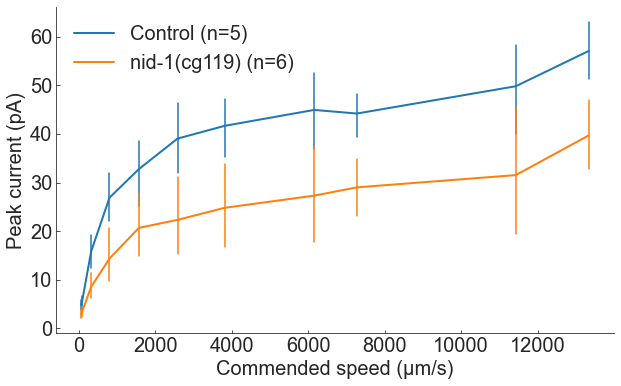

In [14]:
# plot the figures using seaborn 
# plot Trap_ON amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
#sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

fig = sns.lineplot(x='trap_rate', y='amp_peaks_on', data=analysis, hue = 'worm_strain', hue_order = ["TU2769", "GN932"], err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control (n=5)', 'nid-1(cg119) (n=6)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('Peak current (pA)')
plt.xlabel('Commended speed (\u03bcm/s)')

#fig2 = sns.stripplot(x='stim_um', y='t_half_act_on', data=analysis, alpha=0.5,order=order)

#plt.xticks(np.arange(len(order)), xticklabels, rotation=90)  # Set text labels and properties.

In [15]:
analysis2 =  analysis[(analysis['t_half_act_on']>0)]

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

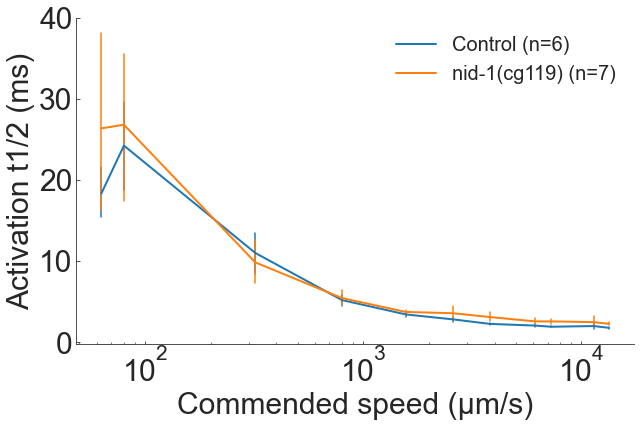

In [21]:
# plot the figures using seaborn 
# plot Trap_ON Activation t1/2



sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
fig = sns.lineplot(x='trap_rate', y='t_half_act_on', data=analysis2, hue = 'worm_strain', hue_order = ["TU2769", "GN932"], err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control (n=6)', 'nid-1(cg119) (n=7)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
fig.set(xscale="log")
plt.ylabel('Activation t1/2 (ms)')
plt.xlabel('Commended speed (\u03bcm/s)')

# save figure to a directory "C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData\TrapData\TrapeON"
plt.savefig('C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapeON/TrapZoidal_ON_act.svg')

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

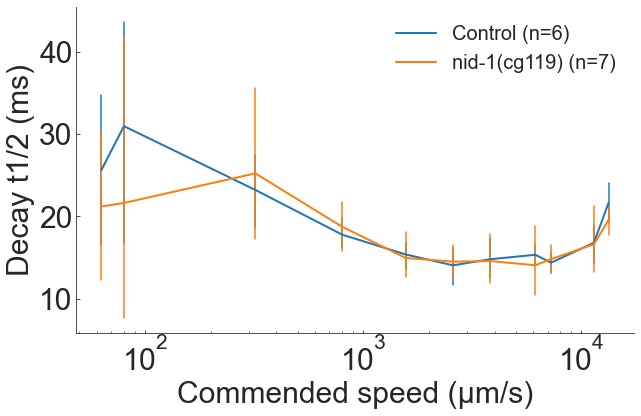

In [23]:
# plot the figures using seaborn 
# plot Trap_ON Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
fig = sns.lineplot(x='trap_rate', y='t_half_decay_on', data=analysis, hue = 'worm_strain', hue_order = ["TU2769", "GN932"],err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control (n=6)', 'nid-1(cg119) (n=7)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
fig.set(xscale="log")
plt.ylabel('Decay t1/2 (ms)')
plt.xlabel('Commended speed (\u03bcm/s)')

# save figure to a directory "C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData\TrapData\TrapeON"
plt.savefig('C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapeON/TrapZoidal_ON_dacay.svg')